<a href="https://colab.research.google.com/github/Jozdien/reward-side-channels/blob/main/Reward_Side_Channels_with_Checkpoints_SB3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.10/dist-packages/pexpect/popen_spawn.py:60: DeprecationWarning: setDaemon() is deprecated, set the daemon attribute instead
  self._read_thread.setDaemon(True)


Mounted at /content/drive


##Installations

In [ ]:
!pip install "stable-baselines3[extra]>=2.0.0a4"
!apt-get update && apt-get install swig cmake ffmpeg freeglut3-dev xvfb
!pip install gym[box2d]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Hit:1 http://security.ubuntu.com/ubuntu focal-security InRelease
Hit:2 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Hit:3 http://archive.ubuntu.com/ubuntu focal InRelease
Hit:4 http://archive.ubuntu.com/ubuntu focal-updates InRelease
Hit:5 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Hit:6 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease
Hit:7 http://archive.ubuntu.com/ubuntu focal-backports InRelease
Hit:8 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Hit:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Hit:10 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Hit:11 http://ppa.launchpad.net/ubuntugis/ppa/ubuntu focal InRelease
Reading package lists... Done
Reading package lists... Done
Building dependency tree       
Reading state information... Done
free

In [ ]:
#!pip list | grep stabl
#!python --version
#!pip list | grep torch

!pip list | grep gym

gym                           0.25.2
gym-notices                   0.0.8
gymnasium                     0.28.1


##Env & Training

In [ ]:
import datetime
import gymnasium as gym
from stable_baselines3 import PPO
from stable_baselines3.ppo import MlpPolicy
from stable_baselines3.common.callbacks import CheckpointCallback, CallbackList, BaseCallback
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.results_plotter import load_results, ts2xy
import numpy as np
import matplotlib.pyplot as plt
import os

In [ ]:
date_time  = datetime.datetime.now().strftime('%Y-%m-%d_%H-%M-%S')
log_dir = "/tmp/gym/"
os.makedirs(log_dir, exist_ok=True)
env = gym.make('LunarLander-v2', render_mode="rgb_array")
env = Monitor(env, log_dir)
checkpoint_callback = CheckpointCallback(save_freq=1000, save_path='./logs/',
                                         name_prefix='ppo_agent')
model = PPO(MlpPolicy, env, verbose = 1)
model.learn(total_timesteps=11000, callback=checkpoint_callback, reset_num_timesteps=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Using cpu device
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 85.6     |
|    ep_rew_mean     | -157     |
| time/              |          |
|    fps             | 894      |
|    iterations      | 1        |
|    time_elapsed    | 2        |
|    total_timesteps | 2048     |
---------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 95.1         |
|    ep_rew_mean          | -173         |
| time/                   |              |
|    fps                  | 682          |
|    iterations           | 2            |
|    time_elapsed         | 6            |
|    total_timesteps      | 4096         |
| train/                  |              |
|    approx_kl            | 0.0067271865 |
|    clip_fraction        | 0.0186       |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.38        |
|    e

In [ ]:
from stable_baselines3 import SAC
from stable_baselines3.common.callbacks import CheckpointCallback

# Save a checkpoint every 1000 steps
checkpoint_callback = CheckpointCallback(
  save_freq=1000,
  save_path="./logs/",
  name_prefix="rl_model",
)

model = SAC("MlpPolicy", "Pendulum-v1", verbose = 1)
model.learn(3000, callback=checkpoint_callback)

Using cpu device
Creating environment from the given name 'Pendulum-v1'
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 200       |
|    ep_rew_mean     | -1.52e+03 |
| time/              |           |
|    episodes        | 4         |
|    fps             | 37        |
|    time_elapsed    | 21        |
|    total_timesteps | 800       |
| train/             |           |
|    actor_loss      | 26.7      |
|    critic_loss     | 0.263     |
|    ent_coef        | 0.812     |
|    ent_coef_loss   | -0.326    |
|    learning_rate   | 0.0003    |
|    n_updates       | 699       |
----------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 200      |
|    ep_rew_mean     | -1.5e+03 |
| time/              |          |
|    episodes        | 8        |
|    fps             | 36       |
|    time_elapsed 

In [ ]:
class SaveOnBestTrainingRewardCallback(BaseCallback):
    """
    Callback for saving a model (the check is done every ``check_freq`` steps)
    based on the training reward (in practice, we recommend using ``EvalCallback``).

    :param check_freq: (int)
    :param log_dir: (str) Path to the folder where the model will be saved.
      It must contains the file created by the ``Monitor`` wrapper.
    :param verbose: (int)
    """

    def __init__(self, check_freq: int, log_dir: str, verbose=1):
        super().__init__(verbose)
        self.check_freq = check_freq
        self.log_dir = log_dir
        self.save_path = os.path.join(log_dir, "best_model")
        self.best_mean_reward = -np.inf

    def _init_callback(self) -> None:
        # Create folder if needed
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)

    def _on_step(self) -> bool:
        if self.n_calls % self.check_freq == 0:

            # Retrieve training reward
            x, y = ts2xy(load_results(self.log_dir), "timesteps")
            if len(x) > 0:
                # Mean training reward over the last 100 episodes
                mean_reward = np.mean(y[-100:])
                if self.verbose > 0:
                    print(f"Num timesteps: {self.num_timesteps}")
                    print(
                        f"Best mean reward: {self.best_mean_reward:.2f} - Last mean reward per episode: {mean_reward:.2f}"
                    )

                # New best model, you could save the agent here
                if mean_reward > self.best_mean_reward:
                    self.best_mean_reward = mean_reward
                    # Example for saving best model
                    if self.verbose > 0:
                        print(f"Saving new best model to {self.save_path}.zip")
                    self.model.save(self.save_path)

        return True

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:

# Save a checkpoint every 1000 steps
date_time  = datetime.datetime.now().strftime('%Y-%m-%d_%H-%M-%S')
log_dir = "/tmp/gym/"
os.makedirs(log_dir, exist_ok=True)
env = gym.make('LunarLander-v2', render_mode="rgb_array")
env = Monitor(env, log_dir)
checkpoint_callback = CheckpointCallback(save_freq=1000, save_path='/content/drive/MyDrive/Reward Side Channels - Model Data/logs_current/',
                                         name_prefix='ppo_agent')
eval_callback = SaveOnBestTrainingRewardCallback(check_freq=1000, log_dir=log_dir)

callback = CallbackList([checkpoint_callback, eval_callback])
model = PPO(MlpPolicy, env, verbose = 1)
model.learn(total_timesteps=200000, callback=callback, reset_num_timesteps=False)


Using cpu device
Wrapping the env in a DummyVecEnv.
Num timesteps: 1000
Best mean reward: -inf - Last mean reward per episode: -219.98
Saving new best model to /tmp/gym/best_model.zip
Num timesteps: 2000
Best mean reward: -219.98 - Last mean reward per episode: -234.48
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 101      |
|    ep_rew_mean     | -227     |
| time/              |          |
|    fps             | 512      |
|    iterations      | 1        |
|    time_elapsed    | 3        |
|    total_timesteps | 2048     |
---------------------------------
Num timesteps: 3000
Best mean reward: -219.98 - Last mean reward per episode: -204.66
Saving new best model to /tmp/gym/best_model.zip
Num timesteps: 4000
Best mean reward: -204.66 - Last mean reward per episode: -196.31
Saving new best model to /tmp/gym/best_model.zip
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 97.5    

In [ ]:
from stable_baselines3 import SAC
from stable_baselines3.common.callbacks import CheckpointCallback

checkpoint_callback = CheckpointCallback(save_freq=1000, save_path='./logs/',
                                         name_prefix='rl_model',  save_replay_buffer=True,
  save_vecnormalize=True)

model = SAC('MlpPolicy', 'LunarLander-v2')
model.learn(3000, callback=checkpoint_callback, reset_num_timesteps=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


AssertionError: ignored

In [ ]:
date_time  = datetime.datetime.now().strftime('%Y-%m-%d_%H-%M-%S')

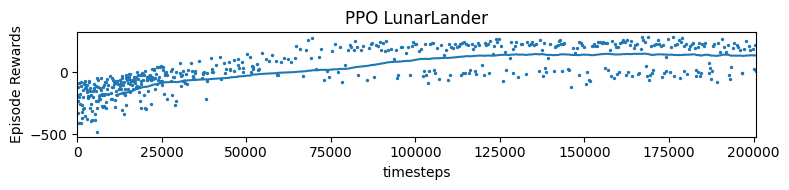

In [ ]:
from stable_baselines3.common import results_plotter

# Helper from the library
results_plotter.plot_results(
    [log_dir], 250000, results_plotter.X_TIMESTEPS, "PPO LunarLander"
)

In [ ]:
def moving_average(values, window):
    """
    Smooth values by doing a moving average
    :param values: (numpy array)
    :param window: (int)
    :return: (numpy array)
    """
    weights = np.repeat(1.0, window) / window
    return np.convolve(values, weights, "valid")


def plot_results(log_folder, title="Learning Curve"):
    """
    plot the results

    :param log_folder: (str) the save location of the results to plot
    :param title: (str) the title of the task to plot
    """
    x, y = ts2xy(load_results(log_folder), "timesteps")
    y = moving_average(y, window=50)
    # Truncate x
    x = x[len(x) - len(y) :]

    fig = plt.figure(title)
    plt.plot(x, y)
    plt.xlabel("Number of Timesteps")
    plt.ylabel("Rewards")
    plt.title(title + " Smoothed")
    plt.show()

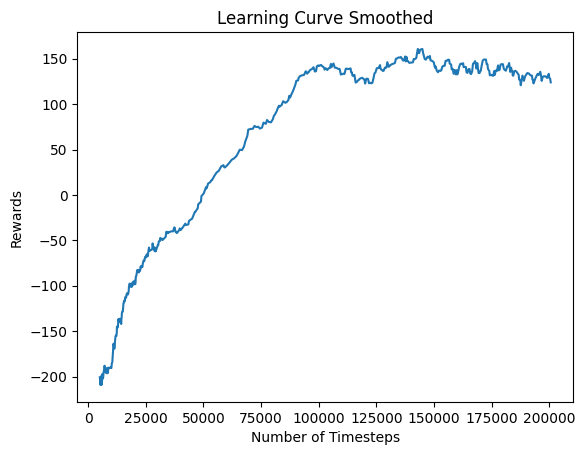

In [ ]:
plot_results(log_dir)

Saving a copy of logs in drive (longterm)

In [ ]:
import shutil

original = r'/content/drive/MyDrive/Reward Side Channels - Model Data/logs_current'
target = r'/content/drive/MyDrive/Reward Side Channels - Model Data/logs_uninterrupted/ppo-agent-results_uninterrupted-ep-20-'+ date_time

shutil.copytree(original, target)

'/content/drive/MyDrive/Reward Side Channels - Model Data/logs_uninterrupted/ppo-agent-results_uninterrupted-ep-20-2023-05-16_08-09-05'

##Attempting the same with interruptions


In [ ]:
date_time  = datetime.datetime.now().strftime('%Y-%m-%d_%H-%M-%S')
log_dir = "/tmp/gym/"
os.makedirs(log_dir, exist_ok=True)
env = gym.make('LunarLander-v2', render_mode="rgb_array")
env = Monitor(env, log_dir)
checkpoint_callback = CheckpointCallback(save_freq=1000, save_path='/content/drive/MyDrive/Reward Side Channels - Model Data/logs_current/',
                                         name_prefix='ppo_agent_interrupted')
eval_callback = SaveOnBestTrainingRewardCallback(check_freq=1000, log_dir=log_dir)

callback = CallbackList([checkpoint_callback, eval_callback])
model = PPO(MlpPolicy, env, verbose = 1)
model.learn(total_timesteps=200000, callback=callback, reset_num_timesteps=False)

Using cpu device
Wrapping the env in a DummyVecEnv.
Num timesteps: 1000
Best mean reward: -inf - Last mean reward per episode: -141.69
Saving new best model to /tmp/gym/best_model.zip
Num timesteps: 2000
Best mean reward: -141.69 - Last mean reward per episode: -186.83
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 96.3     |
|    ep_rew_mean     | -190     |
| time/              |          |
|    fps             | 865      |
|    iterations      | 1        |
|    time_elapsed    | 2        |
|    total_timesteps | 2048     |
---------------------------------
Num timesteps: 3000
Best mean reward: -141.69 - Last mean reward per episode: -181.69
Num timesteps: 4000
Best mean reward: -141.69 - Last mean reward per episode: -192.16
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 97           |
|    ep_rew_mean          | -187         |
| time/                   |              |
|  

KeyboardInterrupt: ignored

In [ ]:
model.learn(total_timesteps=(200000-30000), callback=callback, reset_num_timesteps=False) #running again in case of interrupted runtime - check files to find current timestep; enter only the remaining timesteps (total_timesteps - timestep_at_interruption = new total_timestep)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Num timesteps: 31000
Best mean reward: -76.36 - Last mean reward per episode: -69.96
Saving new best model to /tmp/gym/best_model.zip
Num timesteps: 32000
Best mean reward: -69.96 - Last mean reward per episode: -67.15
Saving new best model to /tmp/gym/best_model.zip
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 172      |
|    ep_rew_mean     | -66.7    |
| time/              |          |
|    fps             | 756      |
|    iterations      | 1        |
|    time_elapsed    | 2        |
|    total_timesteps | 32415    |
---------------------------------
Num timesteps: 33000
Best mean reward: -67.15 - Last mean reward per episode: -65.76
Saving new best model to /tmp/gym/best_model.zip
Num timesteps: 34000
Best mean reward: -65.76 - Last mean reward per episode: -66.84
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 176         |
|    ep_rew_mean          | -64         |
| tim

KeyboardInterrupt: ignored

In [ ]:
model.learn(total_timesteps=(200000-57000), callback=callback, reset_num_timesteps=False) #running again in case of interrupted runtime - check files to find current timestep; enter only the remaining timesteps (total_timesteps - timestep_at_interruption = new total_timestep)

Num timesteps: 58000
Best mean reward: -56.17 - Last mean reward per episode: -55.63
Saving new best model to /tmp/gym/best_model.zip
Num timesteps: 59000
Best mean reward: -55.63 - Last mean reward per episode: -55.52
Saving new best model to /tmp/gym/best_model.zip
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 352      |
|    ep_rew_mean     | -54.5    |
| time/              |          |
|    fps             | 580      |
|    iterations      | 1        |
|    time_elapsed    | 3        |
|    total_timesteps | 59423    |
---------------------------------
Num timesteps: 60000
Best mean reward: -55.52 - Last mean reward per episode: -54.49
Saving new best model to /tmp/gym/best_model.zip
Num timesteps: 61000
Best mean reward: -54.49 - Last mean reward per episode: -53.57
Saving new best model to /tmp/gym/best_model.zip
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 358       

KeyboardInterrupt: ignored

In [ ]:
model.learn(total_timesteps=(200000-105000), callback=callback, reset_num_timesteps=False) #running again in case of interrupted runtime - check files to find current timestep; enter only the remaining timesteps (total_timesteps - timestep_at_interruption = new total_timestep)

Num timesteps: 106000
Best mean reward: 18.16 - Last mean reward per episode: 20.29
Saving new best model to /tmp/gym/best_model.zip
Num timesteps: 107000
Best mean reward: 20.29 - Last mean reward per episode: 21.93
Saving new best model to /tmp/gym/best_model.zip
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 639      |
|    ep_rew_mean     | 21.9     |
| time/              |          |
|    fps             | 386      |
|    iterations      | 1        |
|    time_elapsed    | 5        |
|    total_timesteps | 107505   |
---------------------------------
Num timesteps: 108000
Best mean reward: 21.93 - Last mean reward per episode: 25.19
Saving new best model to /tmp/gym/best_model.zip
Num timesteps: 109000
Best mean reward: 25.19 - Last mean reward per episode: 26.45
Saving new best model to /tmp/gym/best_model.zip
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 652          |

KeyboardInterrupt: ignored

In [ ]:
model.learn(total_timesteps=(200000-154609), callback=callback, reset_num_timesteps=False) #running again in case of interrupted runtime - check files to find current timestep; enter only the remaining timesteps (total_timesteps - timestep_at_interruption = new total_timestep)

Num timesteps: 155000
Best mean reward: 74.19 - Last mean reward per episode: 69.67
Num timesteps: 156000
Best mean reward: 74.19 - Last mean reward per episode: 71.60
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 713      |
|    ep_rew_mean     | 72.3     |
| time/              |          |
|    fps             | 459      |
|    iterations      | 1        |
|    time_elapsed    | 4        |
|    total_timesteps | 156657   |
---------------------------------
Num timesteps: 157000
Best mean reward: 74.19 - Last mean reward per episode: 72.28
Num timesteps: 158000
Best mean reward: 74.19 - Last mean reward per episode: 73.83
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 711          |
|    ep_rew_mean          | 71.1         |
| time/                   |              |
|    fps                  | 413          |
|    iterations           | 2            |
|    time_elapsed      

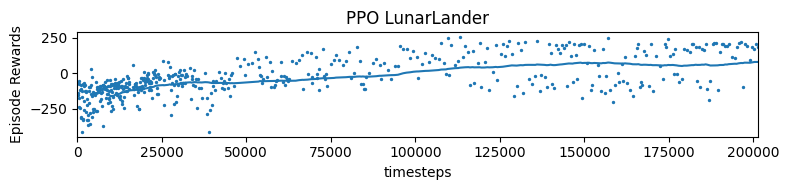

In [ ]:
from stable_baselines3.common import results_plotter

# Helper from the library
results_plotter.plot_results(
    [log_dir], 300000, results_plotter.X_TIMESTEPS, "PPO LunarLander"
)

In [ ]:
def moving_average(values, window):
    """
    Smooth values by doing a moving average
    :param values: (numpy array)
    :param window: (int)
    :return: (numpy array)
    """
    weights = np.repeat(1.0, window) / window
    return np.convolve(values, weights, "valid")


def plot_results(log_folder, title="Learning Curve"):
    """
    plot the results

    :param log_folder: (str) the save location of the results to plot
    :param title: (str) the title of the task to plot
    """
    x, y = ts2xy(load_results(log_folder), "timesteps")
    y = moving_average(y, window=50)
    # Truncate x
    x = x[len(x) - len(y) :]

    fig = plt.figure(title)
    plt.plot(x, y)
    plt.xlabel("Number of Timesteps")
    plt.ylabel("Rewards")
    plt.title(title + " Smoothed")
    plt.show()

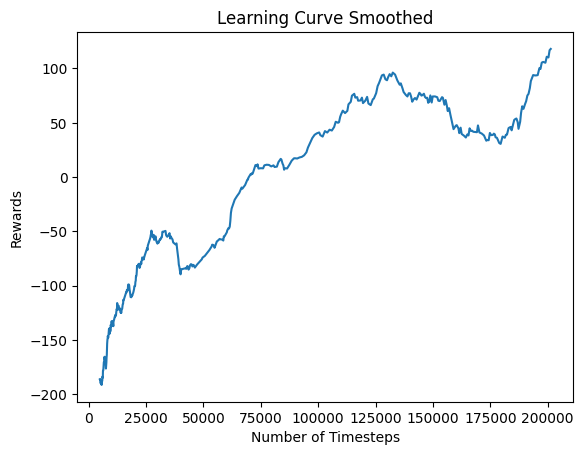

In [ ]:
plot_results(log_dir)

In [ ]:
import shutil
original = r'/content/drive/MyDrive/Reward Side Channels - Model Data/logs_current'
target = r'/content/drive/MyDrive/Reward Side Channels - Model Data/logs_interrupted-/ppo-agent-results_interrupted-ep-20-'+ date_time

shutil.copytree(original, target)

'/content/drive/MyDrive/Reward Side Channels - Model Data/logs_interrupted-/ppo-agent-results_interrupted-ep-20-2023-05-16_08-21-17'

##Lunar Lander Display

In [ ]:
# Set up display; otherwise rendering will fail
os.system("Xvfb :1 -screen 0 1024x768x24 &")
os.environ['DISPLAY'] = ':1'

In [ ]:
import base64
from pathlib import Path

from IPython import display as ipythondisplay


def show_videos(video_path="", prefix=""):
    """
    Taken from https://github.com/eleurent/highway-env

    :param video_path: (str) Path to the folder containing videos
    :param prefix: (str) Filter the video, showing only the only starting with this prefix
    """
    html = []
    for mp4 in Path(video_path).glob("{}*.mp4".format(prefix)):
        video_b64 = base64.b64encode(mp4.read_bytes())
        html.append(
            """<video alt="{}" autoplay 
                    loop controls style="height: 400px;">
                    <source src="data:video/mp4;base64,{}" type="video/mp4" />
                </video>""".format(
                mp4, video_b64.decode("ascii")
            )
        )
    ipythondisplay.display(ipythondisplay.HTML(data="<br>".join(html)))

In [ ]:
from stable_baselines3.common.vec_env import VecVideoRecorder, DummyVecEnv


def record_video(env_id, model, video_length=500, prefix="", video_folder="videos/"):
    """
    :param env_id: (str)
    :param model: (RL model)
    :param video_length: (int)
    :param prefix: (str)
    :param video_folder: (str)
    """
    eval_env = DummyVecEnv([lambda: gym.make("LunarLander-v2", render_mode="rgb_array")])
    # Start the video at step=0 and record 500 steps
    eval_env = VecVideoRecorder(
        eval_env,
        video_folder=video_folder,
        record_video_trigger=lambda step: step == 0,
        video_length=video_length,
        name_prefix=prefix,
    )

    obs = eval_env.reset()
    for _ in range(video_length):
        action, _ = model.predict(obs)
        obs, _, _, _ = eval_env.step(action)

    # Close the video recorder
    eval_env.close()

In [ ]:
record_video("LunarLander-v2", model, video_length=1000, prefix="ppo-lunarlander")

Saving video to /content/videos/ppo-lunarlander-step-0-to-step-1000.mp4
Moviepy - Building video /content/videos/ppo-lunarlander-step-0-to-step-1000.mp4.
Moviepy - Writing video /content/videos/ppo-lunarlander-step-0-to-step-1000.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/ppo-lunarlander-step-0-to-step-1000.mp4


In [ ]:
show_videos("videos", prefix="ppo")

In [ ]:
from stable_baselines3.common import results_plotter

# Helper from the library
results_plotter.plot_results(
    [log_dir], 1e5, results_plotter.X_TIMESTEPS, "TD3 LunarLander"
)

In [ ]:
log_dir = "/tmp/gym/"
os.makedirs(log_dir, exist_ok=True)

# Create and wrap the environment
env = gym.make("LunarLanderContinuous-v2")
# Logs will be saved in log_dir/monitor.csv
env = Monitor(env, log_dir)